In [11]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Create a set of random latitude and longitude combinations.
lats=np.random.uniform(-90,90,size=1500)
lngs=np.random.uniform(-180,180,size=1500)
lat_lngs=zip(lats,lngs)
lat_lngs

In [13]:
# Add the latitudes and longitudes to a list.
coordinates=list(lat_lngs)

In [14]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [15]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [16]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [17]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d585405145fe20ac8f4a8b10a20b4c9c


In [18]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [19]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count +=1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count +=1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count +=1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | rikitea
Processing Record 2 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 13 | salalah
Processing Record 4 of Set 13 | busselton
Processing Record 5 of Set 13 | fallon
Processing Record 6 of Set 13 | kandrian
Processing Record 7 of Set 13 | laguna
Processing Record 8 of Set 13 | upernavik
Processing Record 9 of Set 13 | bethel
Processing Record 10 of Set 13 | tasiilaq
Processing Record 11 of Set 13 | east london
Processing Record 12 of Set 13 | alugan
Processing Record 13 of Set 13 | barentsburg
City not found. Skipping...
Processing Record 14 of Set 13 | tuatapere
Processing Record 15 of Set 13 | ushuaia
Processing Record 16 of Set 13 | bolshoy uluy
City not found. Skipping...
Processing Record 17 of Set 13 | mar del plata
Processing Record 18 of Set 13 | hilo
Processing Record 19 of Set 13 | sur
Processing Record 20 of Set 13 | ngukurr
City not found. Skipping...

Processing Record 34 of Set 16 | middelburg
Processing Record 35 of Set 16 | tiznit
Processing Record 36 of Set 16 | chernyshevskiy
Processing Record 37 of Set 16 | biak
Processing Record 38 of Set 16 | kaitangata
Processing Record 39 of Set 16 | mayo
Processing Record 40 of Set 16 | daru
Processing Record 41 of Set 16 | grand river south east
City not found. Skipping...
Processing Record 42 of Set 16 | trairi
Processing Record 43 of Set 16 | auki
Processing Record 44 of Set 16 | kamenskoye
City not found. Skipping...
Processing Record 45 of Set 16 | saint-georges
Processing Record 46 of Set 16 | hongjiang
Processing Record 47 of Set 16 | ingham
Processing Record 48 of Set 16 | muli
Processing Record 49 of Set 16 | bang saphan
Processing Record 50 of Set 16 | tugdan
Processing Record 1 of Set 17 | sitka
Processing Record 2 of Set 17 | alamosa
Processing Record 3 of Set 17 | mogadishu
Processing Record 4 of Set 17 | port hedland
Processing Record 5 of Set 17 | mongu
Processing Record 6 

Processing Record 18 of Set 20 | dimitrovgrad
Processing Record 19 of Set 20 | verkhoyansk
Processing Record 20 of Set 20 | saint-joseph
Processing Record 21 of Set 20 | santiago de cao
Processing Record 22 of Set 20 | tay ninh
Processing Record 23 of Set 20 | kahului
Processing Record 24 of Set 20 | fomboni
Processing Record 25 of Set 20 | mugur-aksy
Processing Record 26 of Set 20 | sar-e pul
Processing Record 27 of Set 20 | kushima
Processing Record 28 of Set 20 | shelburne
Processing Record 29 of Set 20 | longlac
City not found. Skipping...
Processing Record 30 of Set 20 | amderma
City not found. Skipping...
Processing Record 31 of Set 20 | nautla
Processing Record 32 of Set 20 | san cristobal
Processing Record 33 of Set 20 | padampur
Processing Record 34 of Set 20 | nyurba
Processing Record 35 of Set 20 | guaruja
Processing Record 36 of Set 20 | gat
Processing Record 37 of Set 20 | saiha
Processing Record 38 of Set 20 | castlegar
Processing Record 39 of Set 20 | goundam
Processing 

Processing Record 4 of Set 24 | wewak
Processing Record 5 of Set 24 | ajdabiya
Processing Record 6 of Set 24 | sapa
Processing Record 7 of Set 24 | bokovskaya
Processing Record 8 of Set 24 | maningrida
Processing Record 9 of Set 24 | kristiansund
Processing Record 10 of Set 24 | mumford
Processing Record 11 of Set 24 | conil
Processing Record 12 of Set 24 | oudtshoorn
Processing Record 13 of Set 24 | santa rosa
Processing Record 14 of Set 24 | khor
Processing Record 15 of Set 24 | morti
City not found. Skipping...
Processing Record 16 of Set 24 | sfantu gheorghe
Processing Record 17 of Set 24 | bull savanna
Processing Record 18 of Set 24 | kuusamo
Processing Record 19 of Set 24 | susanville
Processing Record 20 of Set 24 | palmer
Processing Record 21 of Set 24 | marsh harbour
Processing Record 22 of Set 24 | leningradskiy
Processing Record 23 of Set 24 | dzerzhinskoye
Processing Record 24 of Set 24 | buchanan
Processing Record 25 of Set 24 | souillac
Processing Record 26 of Set 24 | ka

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,77.32,73,100,10.71,PF,2022-01-29 21:14:55
1,Salalah,17.0151,54.0924,71.69,73,0,1.14,OM,2022-01-29 21:11:58
2,Busselton,-33.6500,115.3333,67.05,91,5,14.34,AU,2022-01-29 21:14:55
3,Fallon,39.4735,-118.7774,45.43,32,40,3.44,US,2022-01-29 21:14:55
4,Kandrian,-6.2167,149.5500,78.89,85,98,8.43,PG,2022-01-29 21:14:56
5,Laguna,38.4210,-121.4238,66.04,48,0,1.01,US,2022-01-29 21:14:56
6,Upernavik,72.7868,-56.1549,1.80,93,100,8.50,GL,2022-01-29 21:14:56
7,Bethel,41.3712,-73.4140,18.48,63,100,5.01,US,2022-01-29 21:11:53
8,Tasiilaq,65.6145,-37.6368,15.96,76,94,6.64,GL,2022-01-29 21:14:55
9,East London,-33.0153,27.9116,72.01,80,83,10.71,ZA,2022-01-29 21:11:53


In [21]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-01-29 21:14:55,-23.1203,-134.9692,77.32,73,100,10.71
1,Salalah,OM,2022-01-29 21:11:58,17.0151,54.0924,71.69,73,0,1.14
2,Busselton,AU,2022-01-29 21:14:55,-33.6500,115.3333,67.05,91,5,14.34
3,Fallon,US,2022-01-29 21:14:55,39.4735,-118.7774,45.43,32,40,3.44
4,Kandrian,PG,2022-01-29 21:14:56,-6.2167,149.5500,78.89,85,98,8.43
...,...,...,...,...,...,...,...,...,...
548,Havoysund,NO,2022-01-29 21:28:17,70.9963,24.6622,18.48,78,96,17.43
549,Tara,RU,2022-01-29 21:28:17,56.8944,74.3710,4.62,90,100,6.08
550,Koungou,YT,2022-01-29 21:29:18,-12.7336,45.2042,76.71,94,0,5.75
551,Cayenne,GF,2022-01-29 21:29:18,4.9333,-52.3333,79.09,79,0,1.99


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

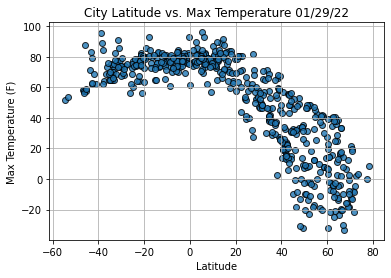

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

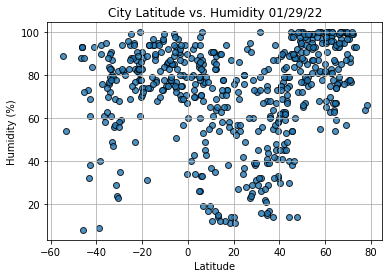

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

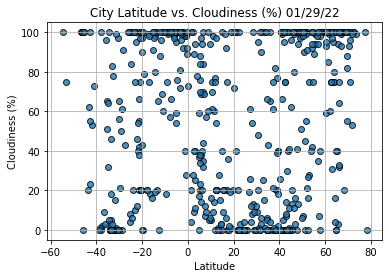

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

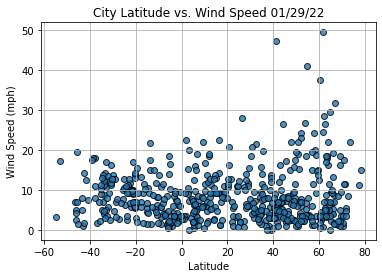

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [29]:
# Import linregress

from scipy.stats import linregress
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [30]:
index13 = city_data_df.loc[13]
index13

City                Mar Del Plata
Country                        AR
Date          2022-01-29 21:10:05
Lat                      -38.0023
Lng                      -57.5575
Max Temp                    84.22
Humidity                       90
Cloudiness                      0
Wind Speed                  18.01
Name: 13, dtype: object

In [31]:
city_data=city_data_df["Lat"] >= 0
city_data.head(10)

0    False
1     True
2    False
3     True
4    False
5     True
6     True
7     True
8     True
9    False
Name: Lat, dtype: bool

In [32]:
city_data= city_data_df.loc[city_data_df["Lat"] >= 0]
city_data.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Salalah,OM,2022-01-29 21:11:58,17.0151,54.0924,71.69,73,0,1.14
3,Fallon,US,2022-01-29 21:14:55,39.4735,-118.7774,45.43,32,40,3.44
5,Laguna,US,2022-01-29 21:14:56,38.4210,-121.4238,66.04,48,0,1.01
6,Upernavik,GL,2022-01-29 21:14:56,72.7868,-56.1549,1.80,93,100,8.50
7,Bethel,US,2022-01-29 21:11:53,41.3712,-73.4140,18.48,63,100,5.01
8,Tasiilaq,GL,2022-01-29 21:14:55,65.6145,-37.6368,15.96,76,94,6.64
10,Alugan,PH,2022-01-29 21:14:57,12.2188,125.4808,77.40,89,54,5.23
14,Hilo,US,2022-01-29 21:14:57,19.7297,-155.0900,78.53,54,20,8.05
15,Sur,OM,2022-01-29 21:14:58,22.5667,59.5289,71.15,54,3,5.46
18,San Ignacio,BZ,2022-01-29 21:14:58,17.1561,-89.0714,69.94,73,75,6.91


In [33]:
city_data_df.loc[city_data_df["Lat"] >= 0].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Salalah,OM,2022-01-29 21:11:58,17.0151,54.0924,71.69,73,0,1.14
3,Fallon,US,2022-01-29 21:14:55,39.4735,-118.7774,45.43,32,40,3.44
5,Laguna,US,2022-01-29 21:14:56,38.4210,-121.4238,66.04,48,0,1.01
6,Upernavik,GL,2022-01-29 21:14:56,72.7868,-56.1549,1.80,93,100,8.50
7,Bethel,US,2022-01-29 21:11:53,41.3712,-73.4140,18.48,63,100,5.01


In [34]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
#northern_hemi_df

In [35]:
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
#southern_hemi_df

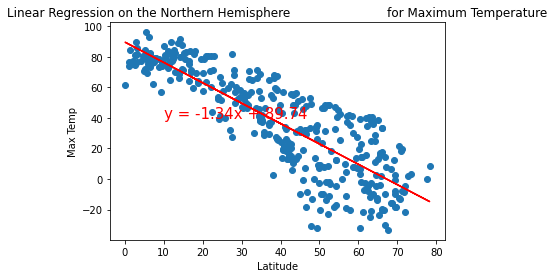

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

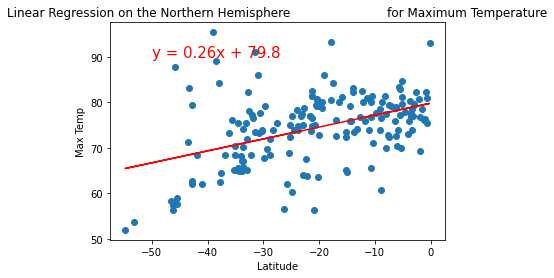

In [40]:
#Perform Linear Regression on the Max Temp for the Southern Hemisphere
#Linear Regression on Southern hemishere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

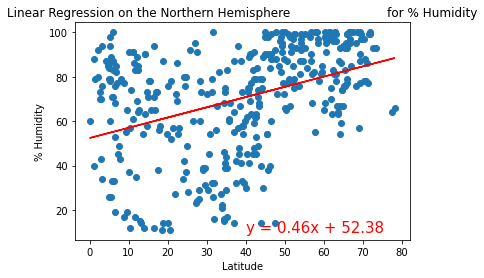

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

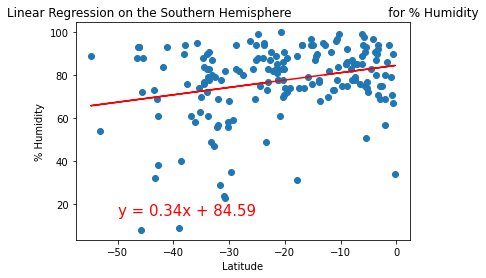

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

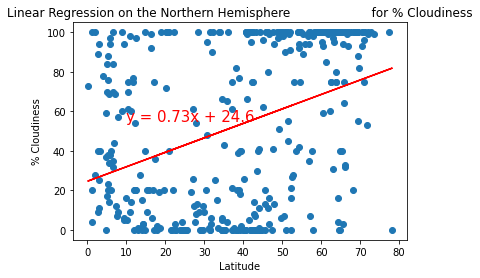

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))

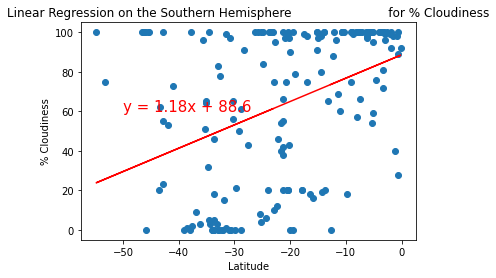

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

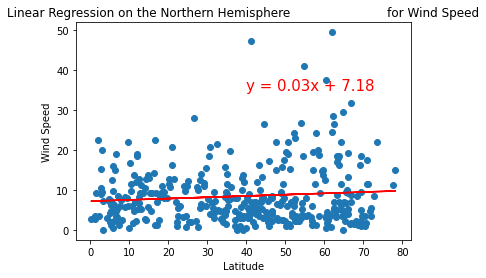

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

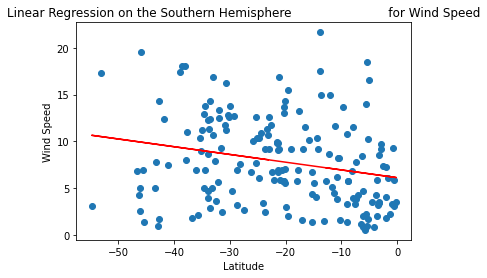

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))